# Unsupervised Learning Project

### Data Description:
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

### Domain:
Object recognition

### Attribute Information:
* All the features are geometric features extracted from the silhouette.
* All are numeric in nature.

### Objective:
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

### 1. Import the Libraries

In [1]:
#Importing All the Libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
sns.set_style(style='darkgrid')  # Setting the plot style. Purely for aesthetic purposes
%matplotlib inline

### 2. Load the dataset

In [2]:
#Read the data as 'Data' dataframe
Data = pd.read_csv('vehicle-1.csv')

In [3]:
#Reading the first five rows of dataset
Data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
#last 5 rows using tail() function
Data.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

* All the columns seem to be numeric, although not necesarily continuous
* Let's check the datatypes, shape and number of missing values in the dataframe to see if there are read as numerical attributes

### 3. Data Preprocessing

In [5]:
#checking the shape of dataset. Dataset having 846 rows and 19 columns.
Data.shape

(846, 19)

In [6]:
#To show the detailed summary
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [7]:
#class attribute is not an object it is a category
Data['class'] = Data['class'].astype('category')

In [8]:
#This is showing dataset having 3 classes, Car, bus and van.
Data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [9]:
#To get the number of columns
Data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [10]:
Data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) of the columns of the dataset. By analysing it, we can see that:

* compactness, circularity, distance_circularity, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about.2, hollows_ratio are approximately normally distributed.

* radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1 are approx. right skewed distribution.

#### Checking Missing Value

In [11]:
# Checking Missing value present in the dataset. It seems that datset is having missing value
Data.apply(lambda x : sum(x.isnull()))

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [12]:
#replacing blank value by 'NAN'
Data = Data.replace(' ', np.nan)
Data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

#### Handling Missing Value

In [13]:
#Replacing the missing values by median 
for i in Data.columns[:17]:
    median_value = Data[i].median()
    Data[i] = Data[i].fillna(median_value)
    

* As some data are rightly skewed so we will use median to handle the missing values.

In [14]:
#Checking the dataset again for missing value. It seems that all missing value are replaced with median.
Data.apply(lambda x : sum(x.isnull()))

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### Understanding the outier using boxplot

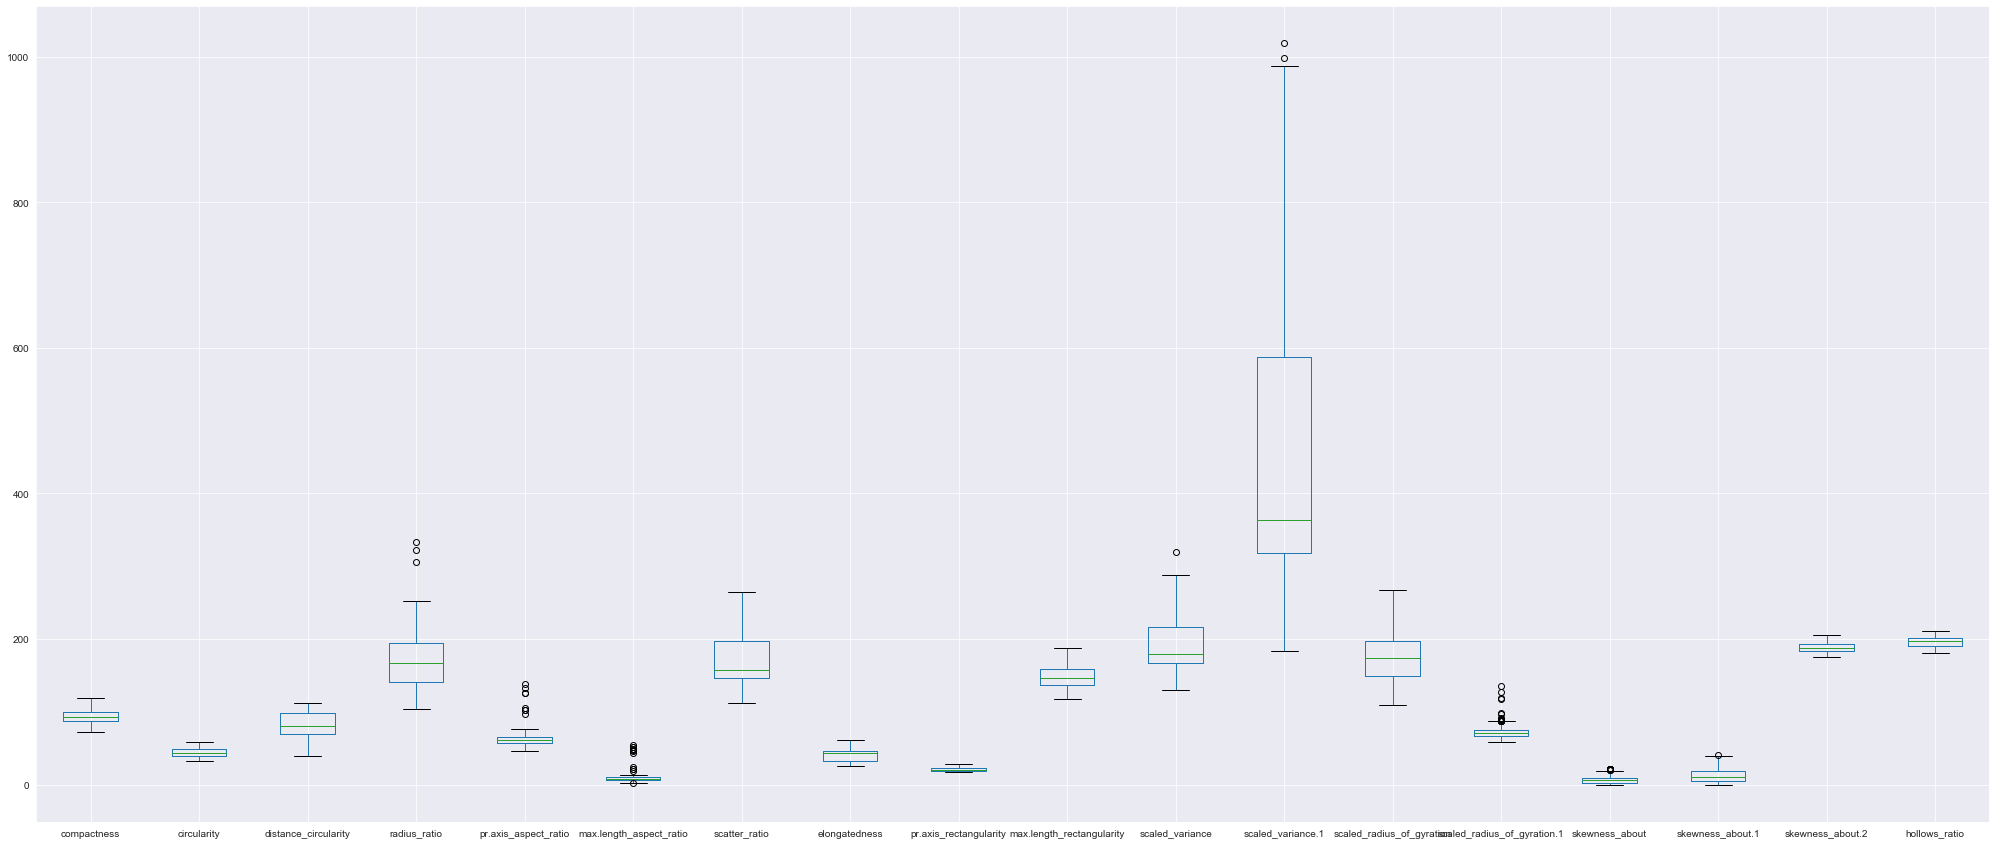

In [15]:
Data.boxplot(figsize =(35,15))

* It is showing that there are some columns which contains outliers such as radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1.

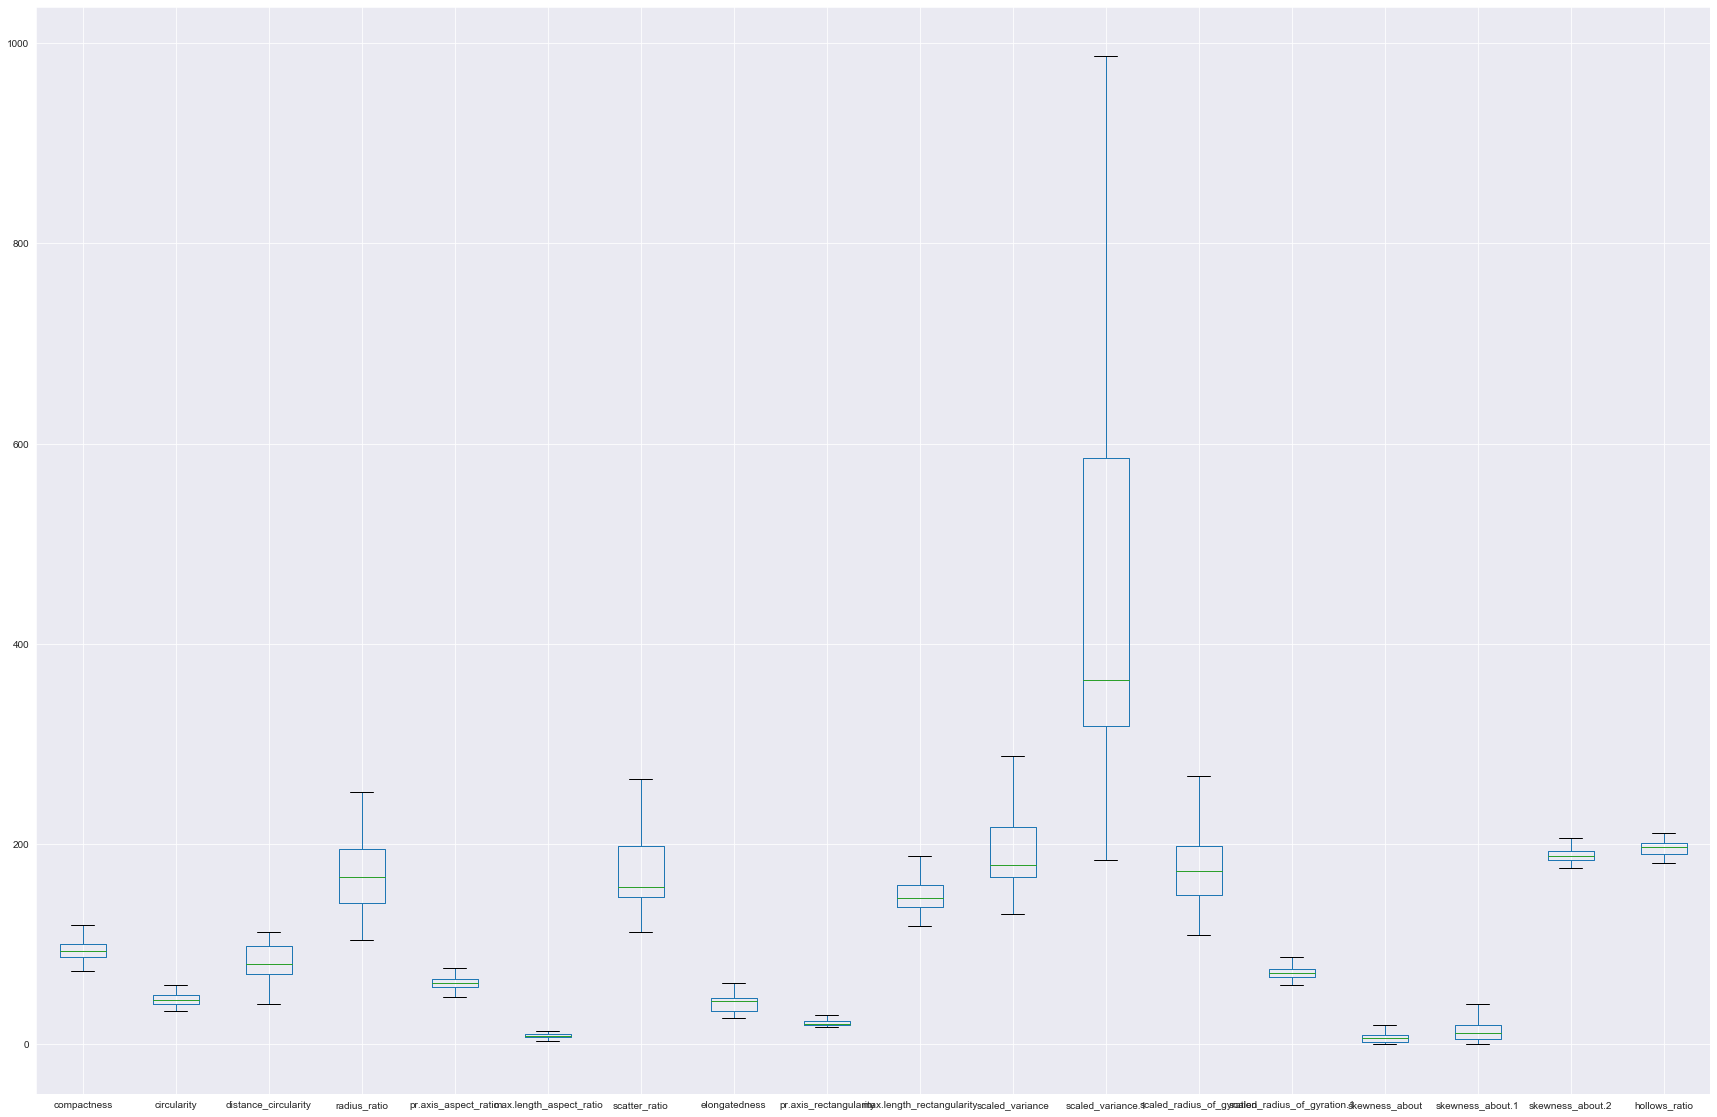

In [16]:
#find the outliers and replace them by median
for column in Data.columns:
    if column in ['radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio','scaled_variance', 'scaled_variance.1','scaled_radius_of_gyration.1','skewness_about', 'skewness_about.1']:
        q1 = Data[column].quantile(0.25)
        q3 = Data[column].quantile(0.75)
        iqr = q3 - q1
        high = float(q3 + 1.5 * iqr)
        low = float(q1 - 1.5 * iqr)
        Data.loc[(Data[column]<low) | (Data[column] > high), column] = Data[column].median()
    
Data.plot(kind = 'box', figsize = (30,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CAE8B2A88>,
      dtype=object)

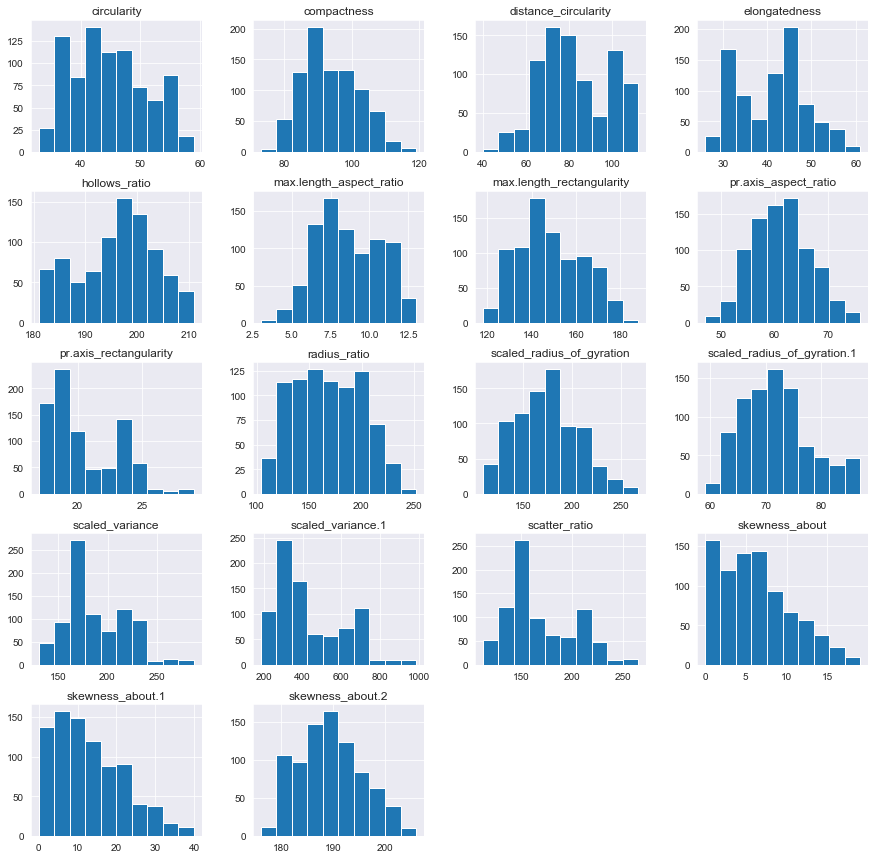

In [17]:
#Showing Data distribution using Histogram 
Data.hist(figsize=(15,15))

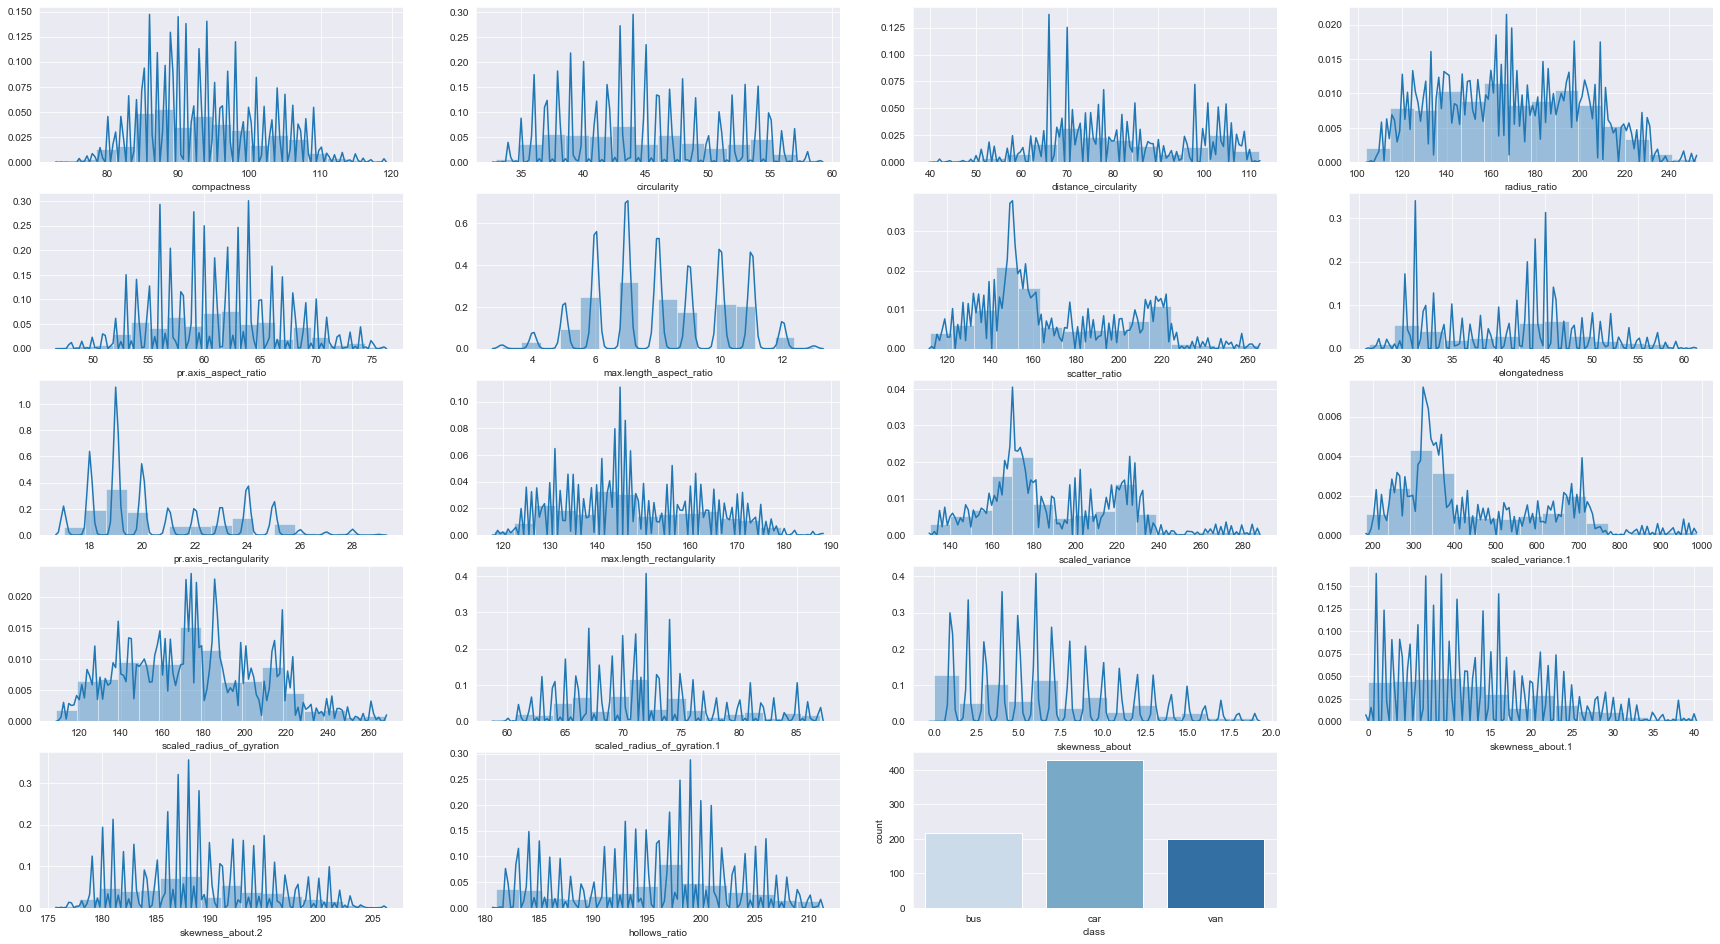

In [18]:
#Data Distribution using KDE
plt.figure(figsize= (30,20))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in Data.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(6, 4, pos)   # plot grid
    if feature in ['compactness', 'circularity', 'distance_circularity', 'radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1','skewness_about.2', 'hollows_ratio']:   # Plot histogram for all the continuous columns
         sns.distplot(Data[feature], kde= True, kde_kws={'bw': 0.1} )
    else:
        sns.countplot(Data[feature], palette= 'Blues')    # Plot bar chart for all the categorical columns
    pos += 1  # to plot over the grid one by one  
    


* From The above observation we can see data distribution of each variable.
* Most of the variables data are left and right skewed.

### 4. Understanding the Attributes

#### Dependant Atrribute

In [19]:
#Class is dependant attribute and having 3 unique categories as Car, bus and van.
Data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

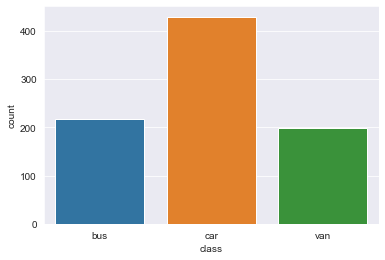

In [20]:
sns.countplot(Data['class'])

In [21]:
#Encoding of categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
Data['class']=labelencoder_X.fit_transform(Data['class'])

#### Independant Attributes

In [22]:
#Correlation Matrix
corr = Data.corr()
corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   
class                           -0.213948             -0.209298   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                            

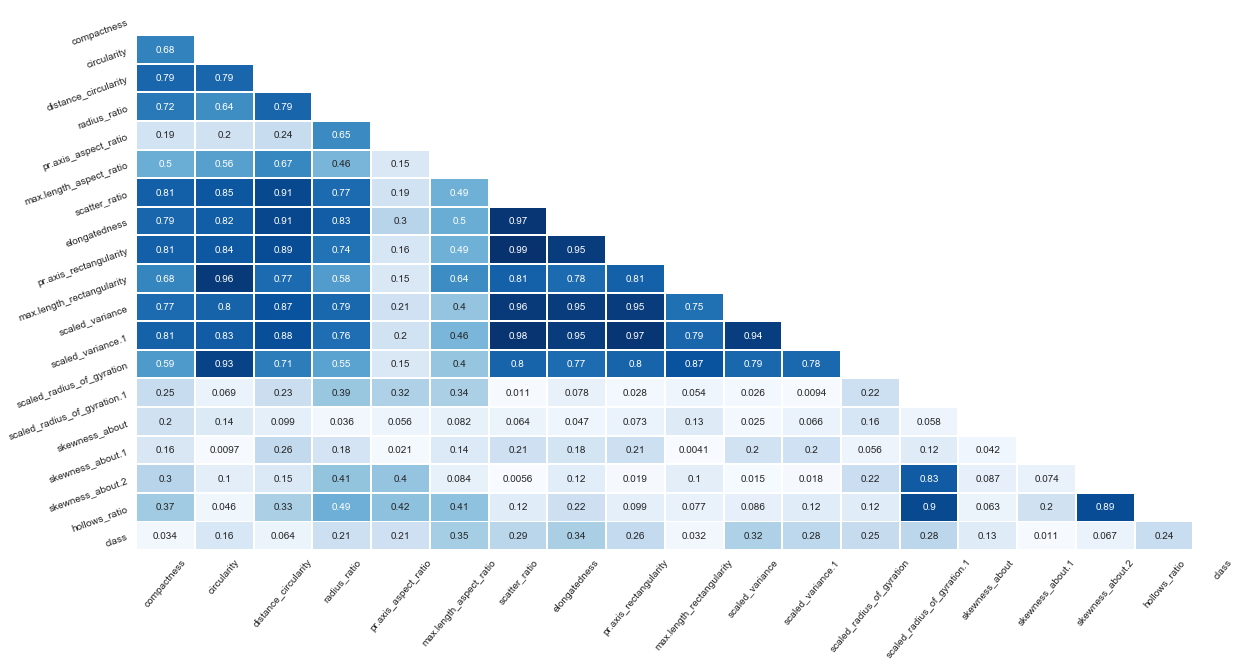

In [23]:
#Showing correlation between each variable using heatmap

corr = abs(Data.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (20,10))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

Form the above obesevation:
* max_lengh_rectangularity, scaled_radiaus_of_gyration are highly corelated with circularity.
* scatter_ratio,elongatedness are corelated with distance_circularity.
* elongatedness, pr.axis_rectangularity, scaled_variance,scaled_variance.1 are higly correlated with scatter_ratio.
* pr.axis_rectangularity, scaled_variance,scaled_variance.1 are higly correlated with elongatedness.
* scaled_variance,scaled_variance.1 are higly correlated with pr.axis_rectangularity.
* scaled_variance.1 are higly correlated with scaled_variance.
* scaled_radiaus_of_gyration are corelated with hollows_ratio.

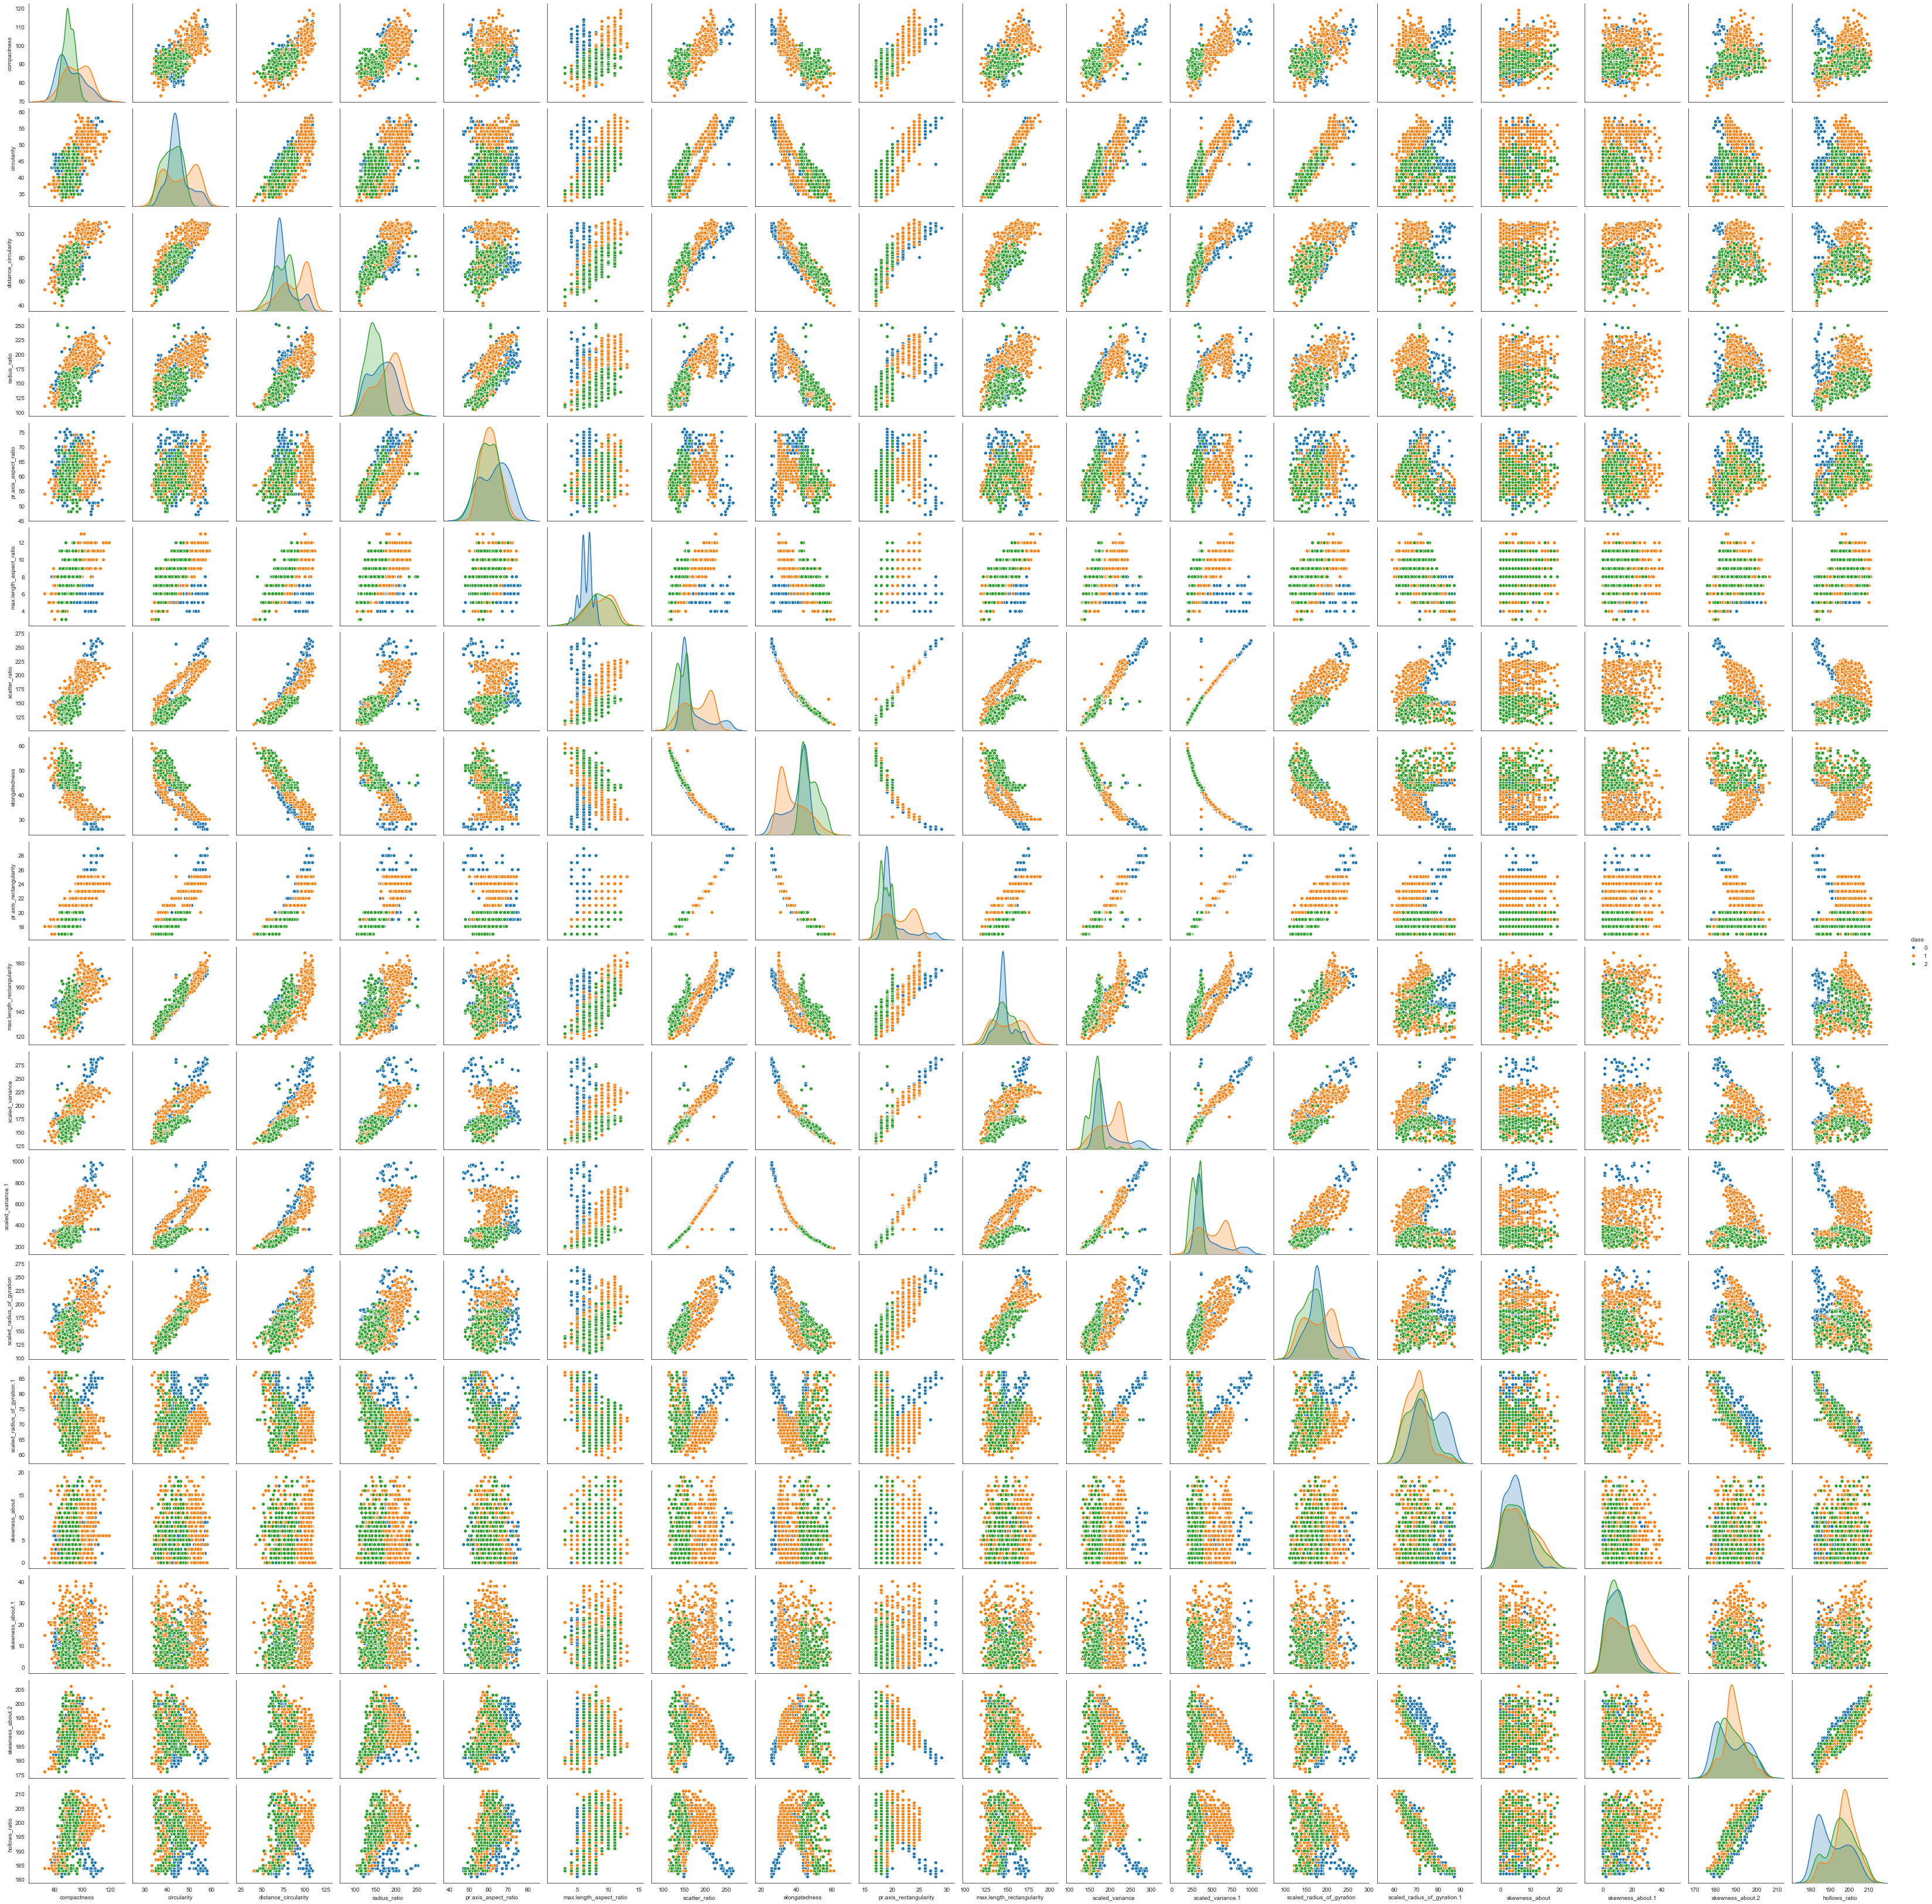

In [24]:
sns.pairplot(Data, hue = 'class', diag_kind='kde')    # pairplot
plt.show()

* compactness has positive linear relationship with circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance1, scaled_variance. compactness has negative linear relationship with elongatedness.
* circularity has positive linear relationship with distance_circularity, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. circularity has negative linear relationship with elongatedness.
* distance_circularity has positive linear relationship with radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. distance_circularity has negative linear relationship with elongatedness.
* radius_ratio has positive linear relationship with pr.axis_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance1, scaled_radius_of_gyration. radius_ratio has negative linear relationship with elongatedness.

In [25]:
Data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                  61.0                      8.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         71.5             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

### 5. Without applying Dimensionality Reduction 

In [26]:
#Now separate the dataframe into dependent and independent variables
X = Data.iloc[:,0:18].values
y = Data.iloc[:,18].values

In [27]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X = sc.fit_transform(X)

In [28]:
#now split the data into 70:30 ratio

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X,y,test_size=0.30,random_state=4)

In [29]:
# Since we will be using multiple models using the same data, thhe following is a user defined function for that purpose 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
def fit_n_print(model, Orig_X_train, Orig_X_test, Orig_y_train, Orig_y_test):  # take the model, and data as inputs
    from sklearn import metrics
    
    model.fit(Orig_X_train, Orig_y_train)   # fir the model with the train data
    
    Orig_pred_train = model.predict(Orig_X_train)   # model predictions on the train data

    Orig_pred = model.predict(Orig_X_test)  # make predictions on the test set

    score = round(model.score(Orig_X_test, Orig_y_test), 4)   # compute accuracy score for test set
    
    #Printing Confusion Matrix
    cm = metrics.confusion_matrix(Orig_pred,Orig_y_test, labels = [0,1,2])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Van ", "Car ", "Bus"]],
                         columns = [i for i in ["Van ", "Car ", "Bus"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    
    
    print(classification_report(Orig_y_test,Orig_pred))

    recall = metrics.recall_score(Orig_y_test, Orig_pred, average='macro')
    precision = metrics.precision_score(Orig_y_test, Orig_pred, average='macro')
    f1_score =  round(2*precision*recall/(precision + recall),3)
    
    return score, recall, precision, f1_score  # return all the metrics


#### 1. LogisticRegression

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        66
           1       0.96      0.92      0.94       130
           2       0.95      0.98      0.97        58

    accuracy                           0.94       254
   macro avg       0.93      0.95      0.94       254
weighted avg       0.94      0.94      0.94       254


 Logistic Model Score: 0.937


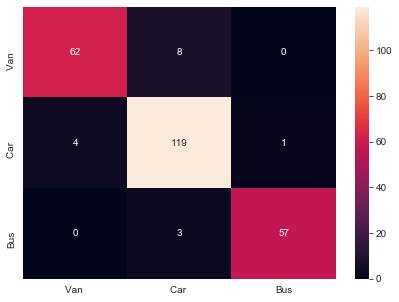

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB  


# Fitting Logistic Regression to the Training set
lr = LogisticRegression(random_state = 4)

lr_accuracy, lr_recall, lr_precision, lr_f1_score = fit_n_print(lr, Orig_X_train, Orig_X_test, Orig_y_train, Orig_y_test)
#Printing Accuracy Score for model
print("\n Logistic Model Score:",lr_accuracy)

#### 2. Support Vector Machine

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.97      0.97      0.97       130
           2       0.95      0.95      0.95        58

    accuracy                           0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254


 Support Vector Machine Model Score: 0.9606


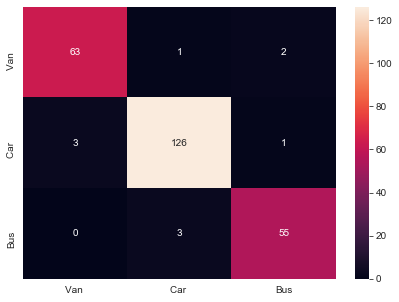

In [31]:
from sklearn import svm
from sklearn.svm import SVC
svm = SVC(gamma=0.025, C=3) 
#fit the model on orighinal raw data
svm.fit(Orig_X_train,Orig_y_train)

svm_accuracy, svm_recall, svm_precision, svm_f1_score = fit_n_print(svm, Orig_X_train, Orig_X_test, Orig_y_train, Orig_y_test)
print("\n Support Vector Machine Model Score:",svm_accuracy)

#### 3. Navie Bayes

              precision    recall  f1-score   support

           0       0.83      0.30      0.44        66
           1       0.79      0.63      0.70       130
           2       0.42      0.91      0.58        58

    accuracy                           0.61       254
   macro avg       0.68      0.62      0.57       254
weighted avg       0.72      0.61      0.61       254


 Naive Bayes Model Score: 0.6102


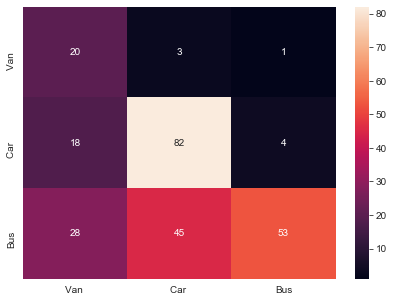

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb_accuracy, nb_recall, nb_precision, nb_f1_score = fit_n_print(nb, Orig_X_train, Orig_X_test, Orig_y_train, Orig_y_test )
print("\n Naive Bayes Model Score:",nb_accuracy)

### 6. Applying Dimensionality Reduction using PCA

### Performing PCA on given Dataset

We will perform PCA in following steps:¶
- Split our data into train and test data set
- normalize the tarining set using standard scalar
- Calculate the covariance matrix.
- Calculate the eigenvectors and their eigenvalues.
- Sort the eigenvectors according to their eigenvalues in descending order.
- Choose the first K eigenvectors (where k is the dimension we'd like to end up with).
- Build new dataset with reduced dimensionality.

1. Split our data into train and test data set

In [33]:
#Now separate the dataframe into dependent and independent variables
X = Data.iloc[:,0:18].values
y = Data.iloc[:,18].values

2. Normalize the tarining set using standard scalar

In [34]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X = sc.fit_transform(X)

3. Calculate the covariance matrix.

In [35]:
#Calculating Covarience Matrix
cov_matrix = np.cov(X.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0

4. Calculating Eigen Vectors & Eigen Values: Using numpy linear algebra function

In [36]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigen Vector \n%s", eigenvectors)

Eigen Vector 
%s [[-2.72502890e-01 -8.70435783e-02  3.81852075e-02  1.38675013e-01
  -1.37101466e-01  2.63611383e-01  2.02717114e-01 -7.58796410e-01
   3.66685918e-01  1.60045219e-01  8.40252779e-02  2.14645175e-02
  -1.87350749e-02  6.89082276e-02  4.26105276e-02  9.97784975e-02
  -8.22590084e-02 -3.30366937e-02]
 [-2.87254690e-01  1.31621757e-01  2.01146908e-01 -3.80554832e-02
   1.38995553e-01 -7.13474241e-02 -3.92275358e-01 -6.76034223e-02
   5.53261885e-02 -1.82323962e-01 -3.65229874e-02  1.47247511e-01
  -4.89102355e-02  5.90534770e-02 -6.74107885e-01  1.63466948e-01
  -2.59100771e-01  2.48832011e-01]
 [-3.02421105e-01 -4.61430061e-02 -6.34621085e-02  1.08954287e-01
   8.00174278e-02 -1.69006151e-02  1.63371282e-01  2.77371950e-01
   7.46784853e-02  2.73033778e-01  4.68505530e-01  6.52730855e-01
   4.74162132e-03 -1.62108150e-01 -4.99754439e-04 -6.36582307e-02
   1.20629778e-01  9.80561531e-02]
 [-2.69713545e-01 -1.97931263e-01 -5.62851689e-02 -2.54355087e-01
  -1.33744367e-01 -1

In [37]:
#Printing Eigen value
print("Eigne Value \n%s", eigenvalues)

Eigne Value 
%s [9.74940269e+00 3.35071912e+00 1.19238155e+00 1.13381916e+00
 8.83997312e-01 6.66265745e-01 3.18150910e-01 2.28179142e-01
 1.31018595e-01 7.98619108e-02 7.33979478e-02 6.46162669e-02
 5.16287320e-03 4.01448646e-02 1.98136761e-02 2.27005257e-02
 3.22758478e-02 2.93936408e-02]


5. Sort the eigenvectors according to their eigenvalues in descending order.

In [38]:
# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.749402689379597, array([-0.27250289, -0.28725469, -0.30242111, -0.26971354, -0.09786073,
       -0.19520014, -0.31052393,  0.3090069 , -0.307287  , -0.27815416,
       -0.29976509, -0.30553237, -0.26323762,  0.04193594, -0.03608321,
       -0.05872048, -0.03801314, -0.08474   ])), (3.3507191194129806, array([-0.08704358,  0.13162176, -0.04614301, -0.19793126, -0.25783995,
       -0.10804563,  0.07528535, -0.01322994,  0.0875602 ,  0.12215424,
        0.07726575,  0.07150302,  0.21058205,  0.50362158, -0.01576632,
       -0.09274624, -0.50162122, -0.50761211])), (1.1923815452731596, array([ 0.03818521,  0.20114691, -0.06346211, -0.05628517,  0.06199275,
        0.14895782, -0.10904283,  0.09085269, -0.1060705 ,  0.21368469,
       -0.1445998 , -0.11034374,  0.20287019, -0.07386402,  0.55917399,
       -0.6706805 ,  0.06224071,  0.04170535])), (1.1338191632147836, array([ 0.13867501, -0.03805548,  0.10895429, -0.25435509, -0.61276572,
        0.27867816,  0.00539295,  0.06521486,  0.

Cumulative Variance Explained [ 54.0993254   72.69242795  79.30893968  85.60048941  90.50578051
  94.2028816   95.96829741  97.23446089  97.96148159  98.40463444
  98.81191882  99.17047375  99.39323715  99.57233547  99.73544045
  99.86140541  99.97135127 100.        ]


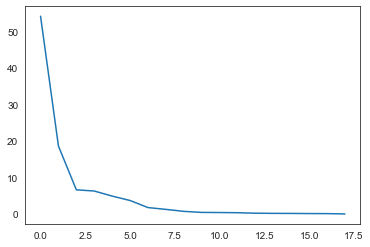

In [39]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.plot(var_exp)

* We can observe that their is steep drop in variance explained with increase in number the number of Principal Components.
* Also, top 10 principal components contribute 98.5% variance (information). So, we can proceed further with 10 components.


#### Plotting The Explained Variance and Principal Components:

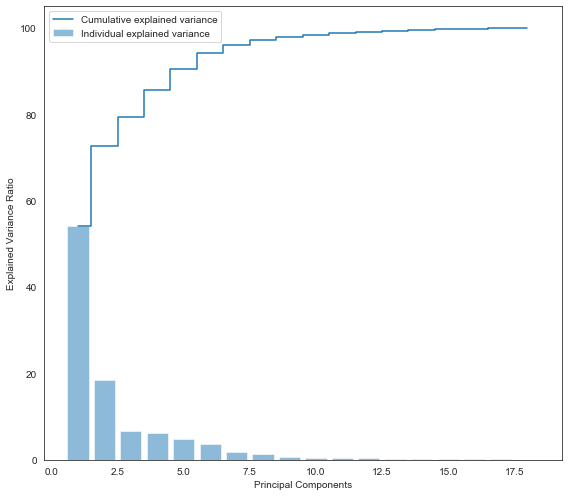

In [40]:
# Ploting 
plt.figure(figsize=(8 , 7))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

- From above we plot we can clealry observer that 8 dimension() are able to explain 95 %variance of data. 
- so we will use first 8 principal components going forward and calulate the reduced dimensions.

#### Dimensionality Reduction
Now 8 dimensions seems very reasonable and With 8 variables we can explain over 95% of the variation in the original data!

In [83]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 10 PCA dimensions.

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)

reduced_pca = pd.DataFrame(data = principalComponents)
reduced_pca.transpose()

0         1         2         3         4         5         6    \
0  0.584228 -1.512180  3.913448 -1.535193 -0.642062  5.382325 -0.813699   
1 -0.675673 -0.348934  0.234507 -3.044413  1.488882  4.658285 -2.220045   
2 -0.453334 -0.333436 -1.265094 -0.469623 -0.246288  1.173396 -1.962160   
3 -0.750656  1.268953  0.137224  0.324317 -0.550939  0.242066 -0.410052   
4 -0.777515 -0.324929  0.915751 -0.611590  0.471655  1.587378  1.522932   
5 -1.848809 -0.118317 -0.685594  0.367777 -1.012698  2.508101  0.655823   
6 -0.180415  0.203308  0.811588  0.118281  0.468846  0.365674 -0.402332   
7 -0.681969  0.104425  0.173053 -0.195857  1.272885  0.440776 -0.147048   
8  0.312670 -0.296258  0.191085 -0.389317  1.487357 -0.252874 -0.140147   
9  0.144116 -0.390978 -0.529487  0.249992 -0.003706 -0.568750 -0.132688   

        7         8         9    ...       836       837       838       839  \
0 -1.957907 -4.380109  1.223449  ... -2.136171 -0.331837 -1.100428 -1.817405   
1 -1.555542 -3.289965 -1.977784  ...  0.335377 -0.835719 -0.365846 -1.939331   
2 -1.007429  0.571911  0.480900  ... -0.144854 -1.859293  0.962369 -1.678188   
3 -0.902755  0.051623  0.491087  ...  0.029526  0.281865  1.145532 -0.204010   
4 -1.212775 -0.441567 -1.040337  ... -1.001299  0.412276 -1.466387 -0.172874   
5  0.065279  0.669753  0.381087  ...  0.024719  0.448536 -0.197353 -0.009259   
6 -0.328964 -0.350658  0.683488  ... -0.965004 -0.161305 -0.292476 -0.642691   
7 -0.338090 -0.221340  0.691869  ... -0.155701  0.311115 -0.689990  0.052418   
8  0.015350 -0.429290 -0.598128  ... -0.073134  0.149999  0.018545  0.083918   
9 -0.041446  0.083639  0.081337  ... -0.155592  0.053742 -0.216342 -0.104487   

        840       841       842       843       844       845  
0 -3.687165 -0.386970 -0.038387  5.120093 -3.297095 -4.967594  
1 -3.442544 -0.637161 -0.193918 -0.182270 -1.101943  0.422750  
2  1.606342  1.463974  0.567673 -0.508368  1.933844  1.308715  
3  1.740727  0.288644 -0.246129 -0.993095  0.441126  0.291942  
4  0.405761  0.811656 -1.922733 -1.320380 -0.502068 -0.174686  
5  0.671948 -0.909567 -1.448913  0.172643  0.020039  0.384693  
6 -0.417887  0.869369 -0.296310  0.884749 -0.260579 -0.393843  
7 -0.380121  0.224138 -0.320109 -0.388208  0.458807 -0.214337  
8  0.046166  0.146911 -0.157723 -0.077355  0.821422  0.596768  
9 -0.160130 -0.251316  0.011204  0.555272 -0.340593  0.108564  

[10 rows x 846 columns]

In [84]:
pca.components_

array([[ 0.27250289,  0.28725469,  0.30242111,  0.26971354,  0.09786073,
         0.19520014,  0.31052393, -0.3090069 ,  0.307287  ,  0.27815416,
         0.29976509,  0.30553237,  0.26323762, -0.04193594,  0.03608321,
         0.05872048,  0.03801314,  0.08474   ],
       [-0.08704358,  0.13162176, -0.04614301, -0.19793126, -0.25783995,
        -0.10804563,  0.07528535, -0.01322994,  0.0875602 ,  0.12215424,
         0.07726575,  0.07150302,  0.21058205,  0.50362158, -0.01576632,
        -0.09274624, -0.50162122, -0.50761211],
       [-0.03818521, -0.20114691,  0.06346211,  0.05628517, -0.06199275,
        -0.14895782,  0.10904283, -0.09085269,  0.1060705 , -0.21368469,
         0.1445998 ,  0.11034374, -0.20287019,  0.07386402, -0.55917399,
         0.6706805 , -0.06224071, -0.04170535],
       [ 0.13867501, -0.03805548,  0.10895429, -0.25435509, -0.61276572,
         0.27867816,  0.00539295,  0.06521486,  0.03089915,  0.04146747,
        -0.06400509, -0.00219687, -0.08553965, -0.115

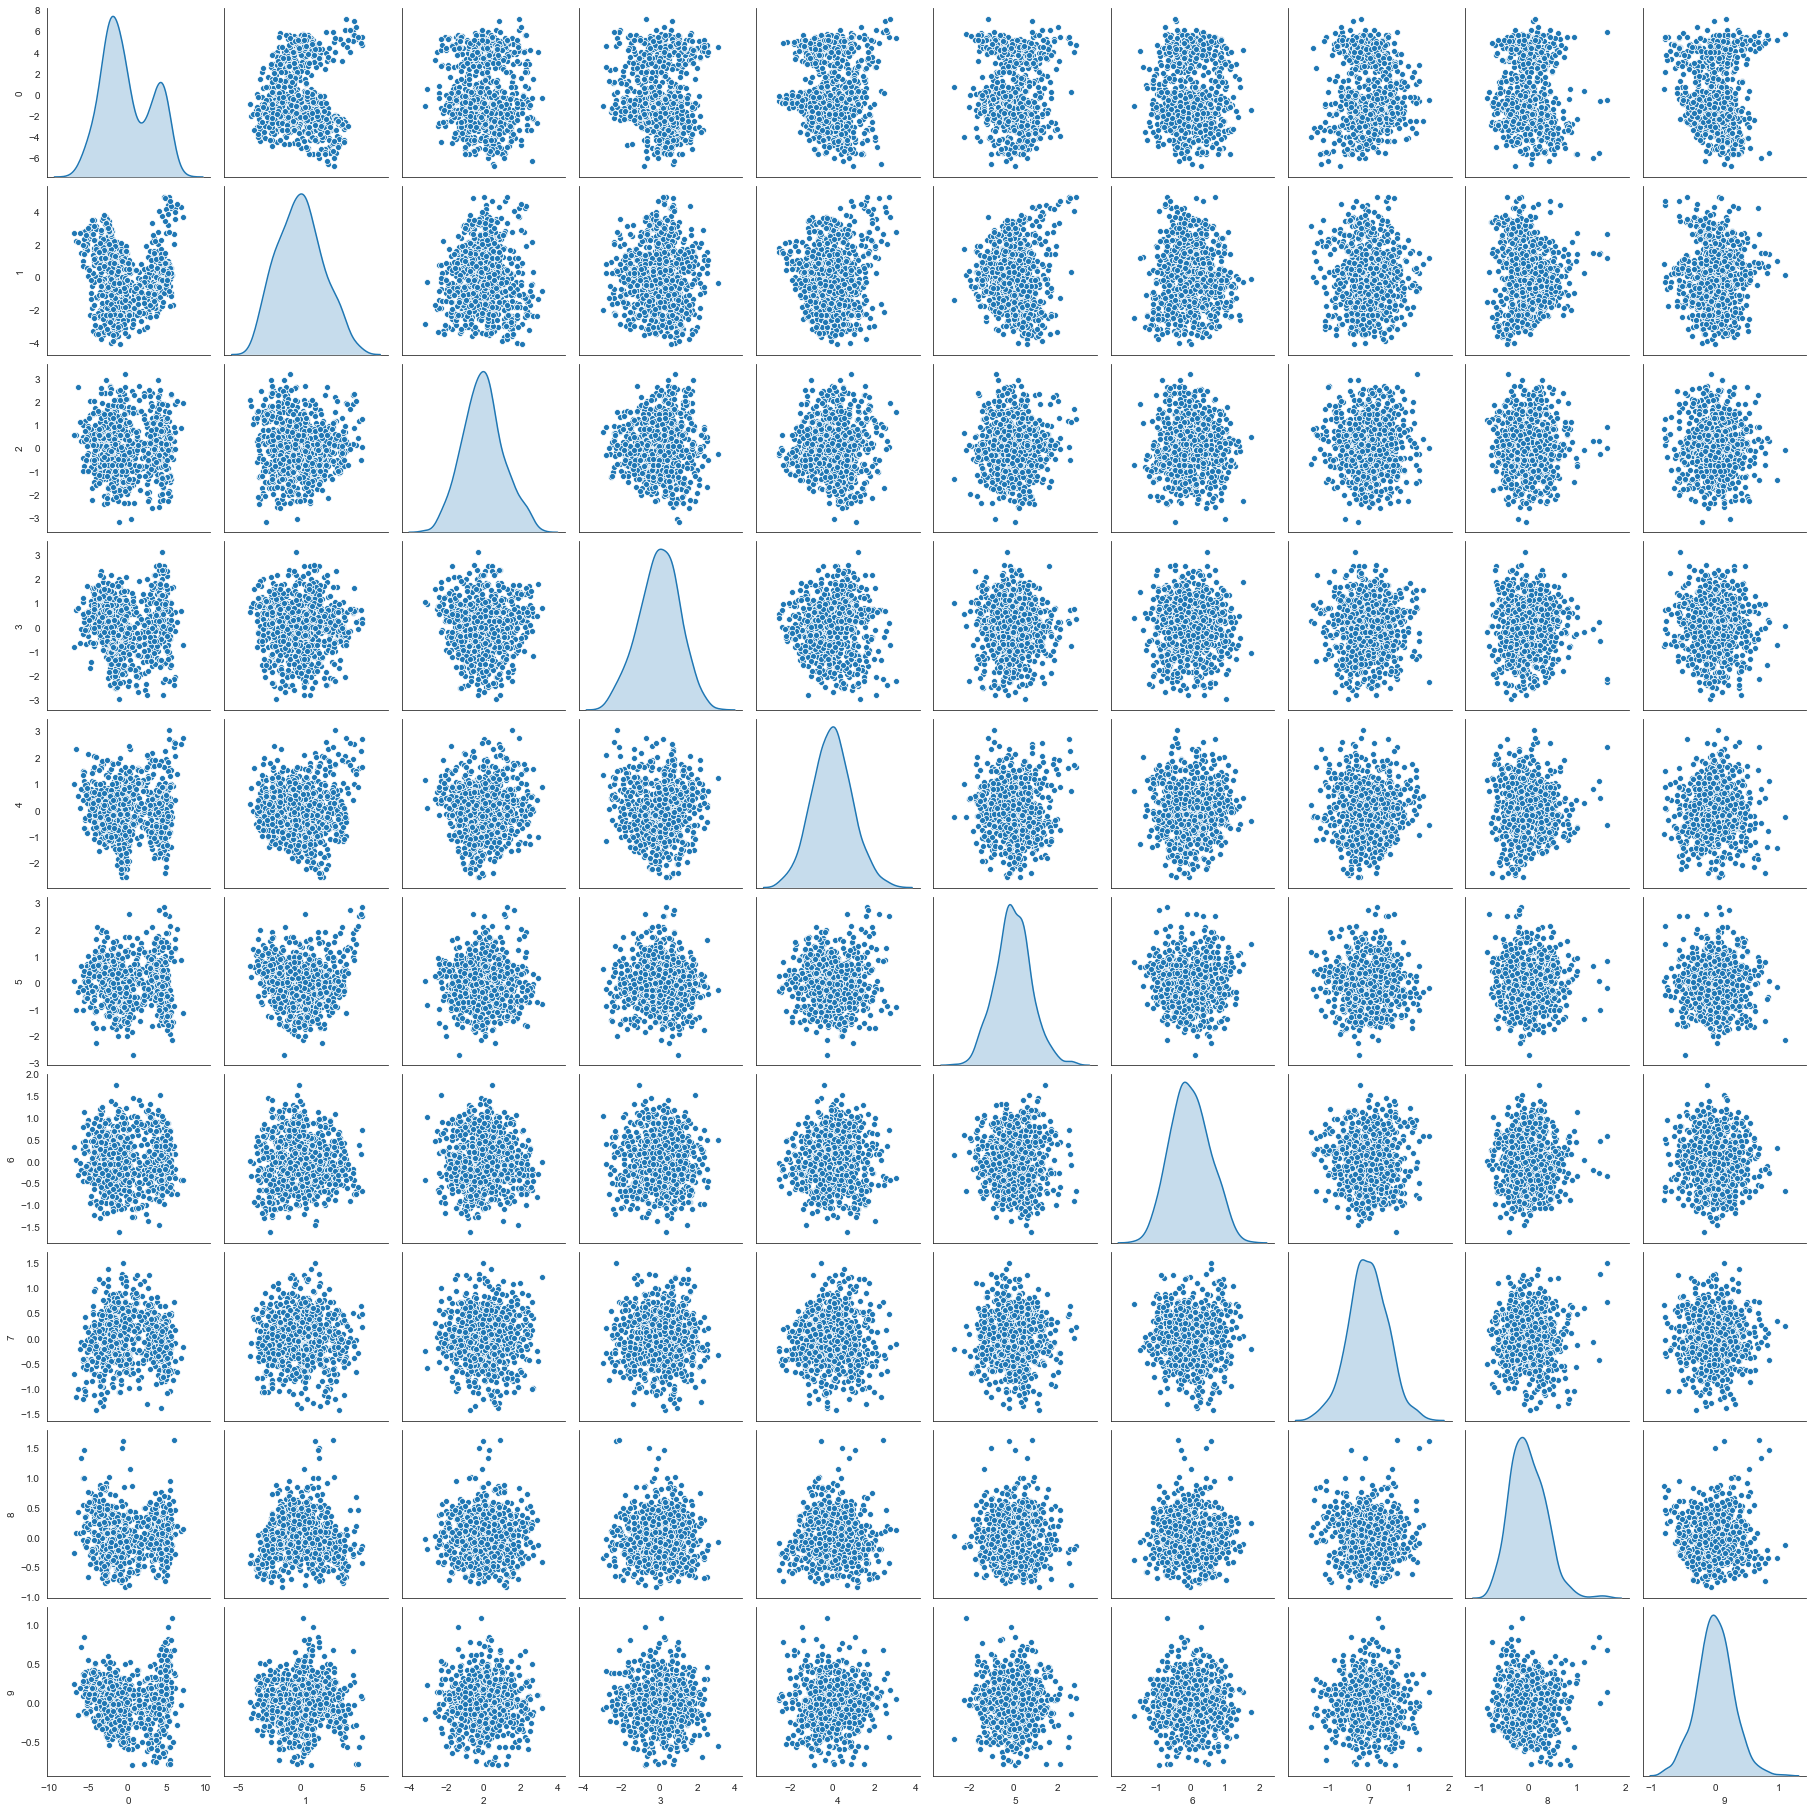

In [85]:
#Let us check The Pairplot Of Reduced Dimension After PCA:
sns.pairplot(reduced_pca, diag_kind='kde')

It is clealry visible from the pairplot above that:
- After dimensionality reduction using PCA our attributes have become independent with no correlation among themselves. As most of them have cloud of data points with no lienaer kind of relationship.

In [86]:
#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=10)

In [87]:
# Since we will be using multiple models using the same data, thhe following is a user defined function for that purpose 
def fit_n_print1(model, pca_X_train, pca_X_test, pca_y_train, pca_y_test):  # take the model, and data as inputs
    from sklearn import metrics
    
    model.fit(pca_X_train, pca_y_train)   # fir the model with the train data
    
    pca_pred_train = model.predict(pca_X_train)   # model predictions on the train data

    pca_pred = model.predict(pca_X_test)  # make predictions on the test set

    score = round(model.score(pca_X_test, pca_y_test), 4)  # compute accuracy score for test set
    
    #Printing Confusion Matrix
    cm = metrics.confusion_matrix(pca_pred,pca_y_test, labels = [0,1,2])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Van ", "Car ", "Bus"]],
                         columns = [i for i in ["Van ", "Car ", "Bus"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    
    
    print(classification_report(pca_y_test,pca_pred))

    recall = metrics.recall_score(pca_y_test, pca_pred, average='macro')
    precision = metrics.precision_score(pca_y_test, pca_pred, average='macro')
    f1_score =  round(2*precision*recall/(precision + recall),3)
    
    return score, recall, precision, f1_score  # return all the metrics


#### 1. Logistic Regression After PCA

              precision    recall  f1-score   support

           0       0.86      0.85      0.85        71
           1       0.93      0.88      0.91       125
           2       0.80      0.91      0.85        58

    accuracy                           0.88       254
   macro avg       0.86      0.88      0.87       254
weighted avg       0.88      0.88      0.88       254


 Logistic Model Score: 0.878


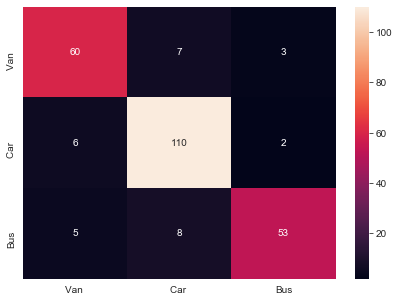

In [88]:
# Fitting Logistic Regression to the Training set
lr1 = LogisticRegression(random_state = 4)

lr1_accuracy, lr1_recall, lr1_precision, lr1_f1_score = fit_n_print1(lr1, pca_X_train, pca_X_test, pca_y_train, pca_y_test)
#Printing Accuracy Score for model
print("\n Logistic Model Score:",lr1_accuracy)

#### 2. SVM after PCA

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.96      0.96       125
           2       0.93      0.91      0.92        58

    accuracy                           0.95       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254


 Support Vector Machine Model Score: 0.9528


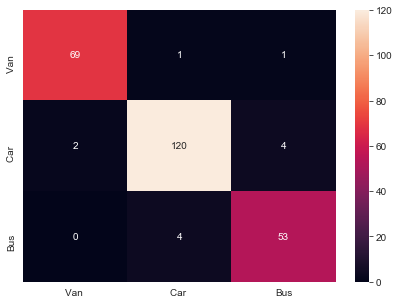

In [89]:
svm1 = SVC(gamma=0.025, C=3) 
#fit the model on orighinal raw data
svm1.fit(pca_X_train,pca_y_train)

svm1_accuracy, svm1_recall, svm1_precision, svm1_f1_score = fit_n_print1(svm1, pca_X_train, pca_X_test, pca_y_train, pca_y_test)
print("\n Support Vector Machine Model Score:",svm1_accuracy)

In [90]:
#Use the SVM Classifier with k fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm1,reduced_pca , y, cv=10)
print(scores)
print('Average score: ', np.mean(scores))


[0.90588235 0.95294118 0.94117647 0.96470588 0.96470588 0.96470588
 0.9047619  0.95238095 0.96428571 0.96428571]
Average score:  0.9479831932773107


#### 3. Navie Bayes After PCA

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        71
           1       0.87      0.90      0.89       125
           2       0.79      0.84      0.82        58

    accuracy                           0.85       254
   macro avg       0.84      0.83      0.83       254
weighted avg       0.85      0.85      0.85       254


 Naive Bayes Model Score: 0.8465


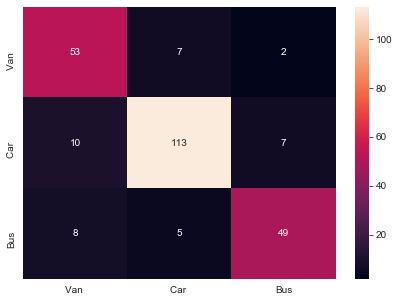

In [91]:
nb1 = GaussianNB()

nb1_accuracy, nb1_recall, nb1_precision, nb1_f1_score = fit_n_print1(nb1, pca_X_train, pca_X_test, pca_y_train, pca_y_test )
print("\n Naive Bayes Model Score:",nb1_accuracy)

###  7. Apply Grid Search & Cross-Validation:To Tune Our Model and Validate The Model's Accuracy Score

In [92]:
import itertools

def classifiers_hypertune(name,rf,param_grid,x_train_scaled,y_train,x_test_scaled,y_test,CV):
    from sklearn import metrics
    CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=CV, verbose= 1, n_jobs =-1 )
    CV_rf.fit(x_train_scaled, y_train)
    
    y_pred_train = CV_rf.predict(x_train_scaled)
    y_pred_test = CV_rf.predict(x_test_scaled)
    #model.fit(X_train_scaled, y_train)
    print('Best Score: ', CV_rf.best_score_)
    print('Best Params: ', CV_rf.best_params_)
    
    score = round(accuracy_score(y_test, y_pred_test),4)
    
    #Classification Report
    print(name+" Classification Report: ")
    print(classification_report(y_test, y_pred_test))
    
    #Printing Confusion Matrix
    cm = metrics.confusion_matrix(y_pred_test,y_test, labels = [0,1,2])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Van ", "Car ", "Bus"]],
                         columns = [i for i in ["Van ", "Car ", "Bus"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')

    recall = metrics.recall_score(y_test, y_pred_test, average='macro')
    precision = metrics.precision_score(y_test, y_pred_test, average='macro')
    f1_score =  round(2*precision*recall/(precision + recall),3)
    
    return score, recall, precision, f1_score  # return all the metrics

    

#### 4. KFold and GridSerach After PCA

In [93]:
from sklearn.model_selection import GridSearchCV
svmc1 = SVC()

#Let's See What all parameters one can tweak 
print("SVM Parameters:", svmc1.get_params())

# Create the parameter grid based on the results of random search 
param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1],  'kernel': ['rbf']},
 ]

param_grid_1 = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]


SVM Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.4s finished


Best Score:  0.9392937853107345
Best Params:  {'C': 1, 'kernel': 'rbf'}
Support Vector Machine Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.97      0.96       125
           2       0.93      0.91      0.92        58

    accuracy                           0.96       254
   macro avg       0.96      0.95      0.95       254
weighted avg       0.96      0.96      0.96       254


 SVM Model Score: 0.9567


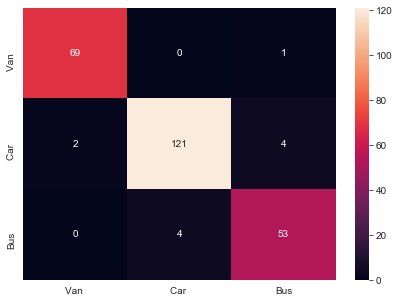

In [94]:
#K Fold Cross Validation Grid Search After PCA
svmc1_accuracy, svmc1_recall, svmc1_precision, svmc1_f1_score=classifiers_hypertune("Support Vector Machine",svmc1, param_grid,pca_X_train, pca_y_train, pca_X_test, pca_y_test,10)
print("\n SVM Model Score:",svmc1_accuracy)

#### KFold and GridSerach Before PCA

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished


Best Score:  0.952683615819209
Best Params:  {'C': 0.5, 'kernel': 'rbf'}
Support Vector Machine Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        66
           1       0.97      0.95      0.96       130
           2       0.93      0.90      0.91        58

    accuracy                           0.94       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.95      0.94      0.94       254


 SVM Model Score: 0.9449


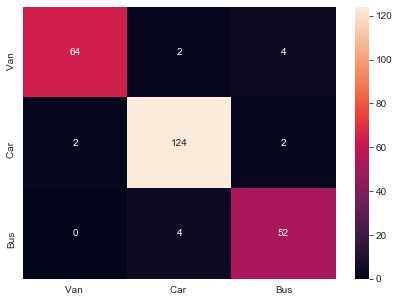

In [95]:
#K-Fold Cross Validation on Original Data
svmc = SVC()
svmc_accuracy, svmc_recall, svmc_precision, svmc_f1_score=classifiers_hypertune("Support Vector Machine",svmc, param_grid,Orig_X_train, Orig_y_train, Orig_X_test, Orig_y_test,10)
print("\n SVM Model Score:",svmc_accuracy)

### 8. Compare the accuracy scores and cross validation scores of Support vector machines

In [96]:
result = pd.DataFrame({'Model' : ['Before PCA Logistic Regression', 'After PCA Logistic Regression',"Before PCA Naive Bayes'",  "After PCA Naive Bayes'", 'Before PCA SVM','After PCA SVM','Before PCA SVM with K Fold & Grid Serach', 'After PCA SVM with K Fold & Grid Search'],
                        'Accuracy': [ lr_accuracy , lr1_accuracy , nb_accuracy , nb1_accuracy , svm_accuracy, svm1_accuracy,svmc_accuracy,svmc1_accuracy],
                        'Recall' : [lr_recall , lr1_recall , nb_recall ,nb1_recall, svm_recall,svm1_recall,svmc_recall,svmc1_recall],
                        'Precision': [lr_precision , lr1_precision , nb_precision ,nb1_precision , svm_precision,svm1_precision,svmc_precision,svmc1_precision],
                        'F1 Score' : [lr_f1_score, lr1_f1_score, nb_f1_score, nb1_f1_score, svm_f1_score,svm1_f1_score,svmc_f1_score,svmc1_f1_score]})
result


Model  Accuracy    Recall  Precision  \
0            Before PCA Logistic Regression    0.9370  0.945846   0.931797   
1             After PCA Logistic Regression    0.8780  0.879621   0.864126   
2                   Before PCA Naive Bayes'    0.6102  0.615864   0.680810   
3                    After PCA Naive Bayes'    0.8465  0.831769   0.838131   
4                            Before PCA SVM    0.9606  0.957351   0.957351   
5                             After PCA SVM    0.9528  0.948541   0.951345   
6  Before PCA SVM with K Fold & Grid Serach    0.9449  0.940032   0.937202   
7   After PCA SVM with K Fold & Grid Search    0.9567  0.951208   0.956098   

   F1 Score  
0     0.939  
1     0.872  
2     0.647  
3     0.835  
4     0.957  
5     0.950  
6     0.939  
7     0.954

* From the above obesrvation we can see the comparision of model before and After applying PCA.
* It is clearly visible that SVM performed very well as compare to other model.
* After applying PCA it got reduced but after applying grid search and PCA result was improved.
* The model I would pick SVM as my final model because it has better numbers overall.